<a href="https://colab.research.google.com/github/JoshDevx/An-lisis-de-Rendimiento---Alura-Store-/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [43]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [44]:
#ID para cada Tienda
tienda['ID_Tienda'] = 'Tienda_1'
tienda2['ID_Tienda'] = 'Tienda_2'
tienda3['ID_Tienda'] = 'Tienda_3'
tienda4['ID_Tienda'] = 'Tienda_4'

#Combinamos los datos
datos_completos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
datos_completos.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,ID_Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda_1


In [45]:
#Suma de Precio por cada Tienda
suma_por_tienda = datos_completos.groupby('ID_Tienda')['Precio'].sum()
#Formateamos los resultados
suma_por_tienda.apply(lambda x: f"{x:,.0f}")

,Precio
ID_Tienda,
Tienda_1,"1,150,880,400"
Tienda_2,"1,116,343,500"
Tienda_3,"1,098,019,600"
Tienda_4,"1,038,375,700"


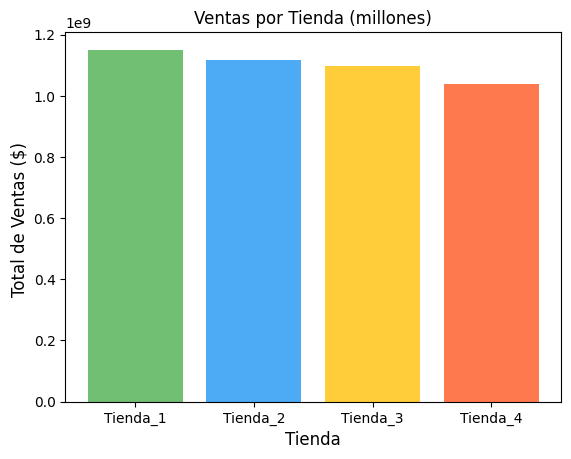

In [46]:
#Importamos matploit para la creación de graficos
import matplotlib.pyplot as plt

#Obtenemos el ID de tienda para el eje X
nombres_tiendas = suma_por_tienda.index
#Obtenemos el valor de precio para el eje Y
valores_tiendas = suma_por_tienda.values

# Crear el gráfico de barras
plt.bar(nombres_tiendas,
        valores_tiendas,
        #Agregamos color a nuestro grafico
        color= ['#4CAF50', '#2196F3', '#FFC107', '#FF5722'],
        #Transparencia a las barras (0 a 1)
        alpha =0.8)
plt.title('Ventas por Tienda (millones)', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Total de Ventas ($) ',fontsize=12)
plt.show()

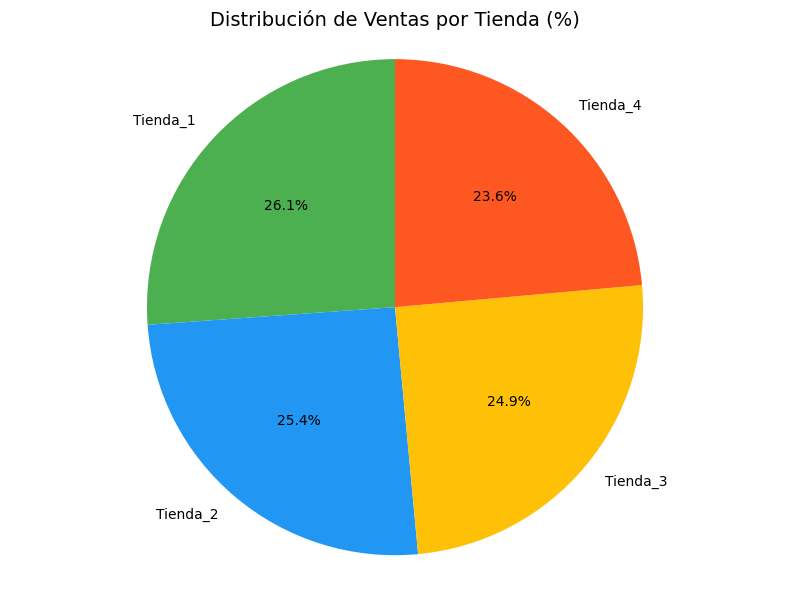

In [51]:
#Obtenemos el ID de tienda para el eje X
nombres_tiendas = suma_por_tienda.index
#Obtenemos el valor de precio para el eje Y
valores_tiendas = suma_por_tienda.values
plt.figure(figsize=(8, 6))
plt.pie(valores_tiendas,
        labels=nombres_tiendas,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50', '#2196F3', '#FFC107', '#FF5722'],
        shadow=False)
plt.title('Distribución de Ventas por Tienda (%)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [29]:
#Suma de Precio por Categoria de producto
suma_por_categoria = datos_completos.groupby('Categoría del Producto')['Precio'].sum()
suma_cat_ordenada = suma_por_categoria.sort_values()
#Formato a los resultados
suma_cat_ordenada.apply(lambda x: f"{x:,.0f}")

,Precio
Categoría del Producto,
Libros,"37,696,100"
Artículos para el hogar,"57,579,800"
Juguetes,"73,604,400"
Deportes y diversión,"142,977,700"
Instrumentos musicales,"348,772,600"
Muebles,"757,661,000"
Electrodomésticos,"1,324,751,100"
Electrónicos,"1,660,576,500"


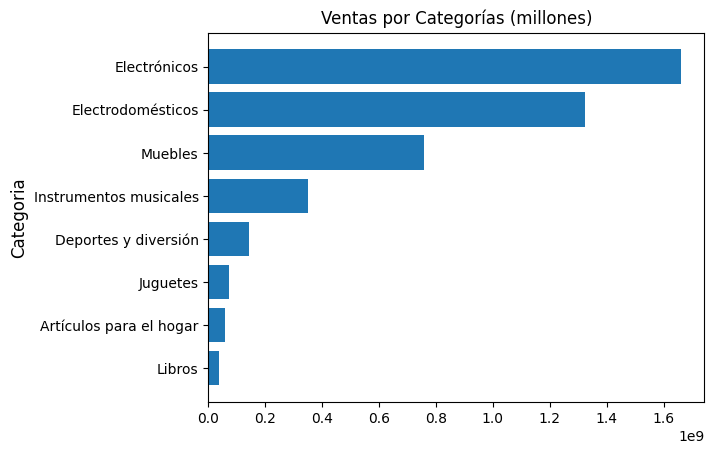

In [30]:
#Obtenemos el valor de precio
precio_por_tienda = suma_cat_ordenada.values
#Obtenemos Las categorias
categorias = suma_cat_ordenada.index
#Creamos el grafico
plt.barh(categorias, precio_por_tienda)
plt.title('Ventas por Categorías (millones)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.show()

# 3. Calificación promedio de la tienda


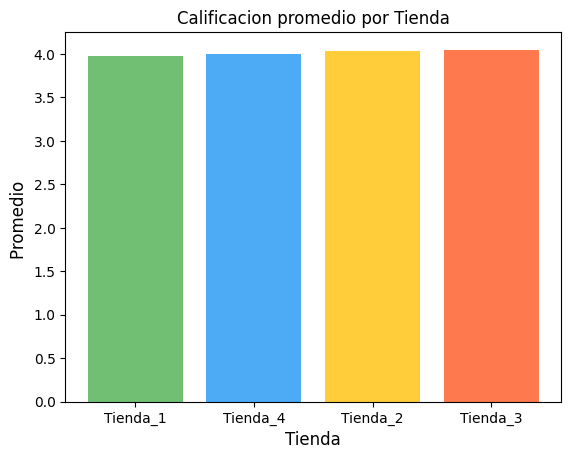

In [31]:
#Promedio de calificación por tienda
promedio_por_tienda = datos_completos.groupby('ID_Tienda')['Calificación'].mean()
#Orden por resultado
promedio_por_tienda_ordenado = promedio_por_tienda.sort_values()
#Obtenemos el ID de tienda para el eje X
nombres_tiendas = promedio_por_tienda_ordenado.index
#Obtenemos el valor promedio para el eje Y
promedio_tienda = promedio_por_tienda_ordenado.values

# Crear el gráfico de barras
plt.bar(nombres_tiendas,
        promedio_tienda,
        #Agregamos color a nuestro grafico
        color= ['#4CAF50', '#2196F3', '#FFC107', '#FF5722'],
        #Transparencia a las barras (0 a 1)
        alpha =0.8)
plt.title('Calificacion promedio por Tienda', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Promedio ',fontsize=12)
plt.show()

In [32]:
import matplotlib.pyplot as plt
def promedio_calificacion_tienda(tienda):
  datos_tienda = datos_completos[datos_completos['ID_Tienda'] == tienda]
  promedio_calificacion_tienda_vendedor = datos_tienda.groupby('Vendedor')['Calificación'].mean()
  promedio_calificacion_tienda_vendedor_ordenado = promedio_calificacion_tienda_vendedor.sort_values()
  #Obtenemos el ID de tienda para el eje X
  vendedor = promedio_calificacion_tienda_vendedor_ordenado.index
  #Obtenemos el valor de promedio para el eje Y
  valores = promedio_calificacion_tienda_vendedor_ordenado.values
  plt.bar(vendedor,
          valores,
          #Transparencia a las barras (0 a 1)
          alpha =0.8)
  plt.title(f'Promedio por Vendedor - {tienda}', fontsize=12)
  plt.xlabel('Vendedor', fontsize=12)
  plt.ylabel('Calificación promedio',fontsize=12)
  plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar 45 grados, alinear a la derecha y ajustar el tamaño de la fuente
  plt.tight_layout()
  plt.show()

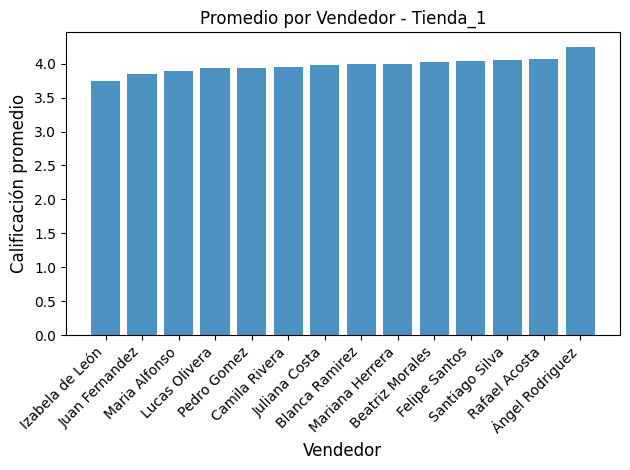

In [11]:
promedio_calificacion_tienda('Tienda_1')

# 4. Productos más y menos vendidos

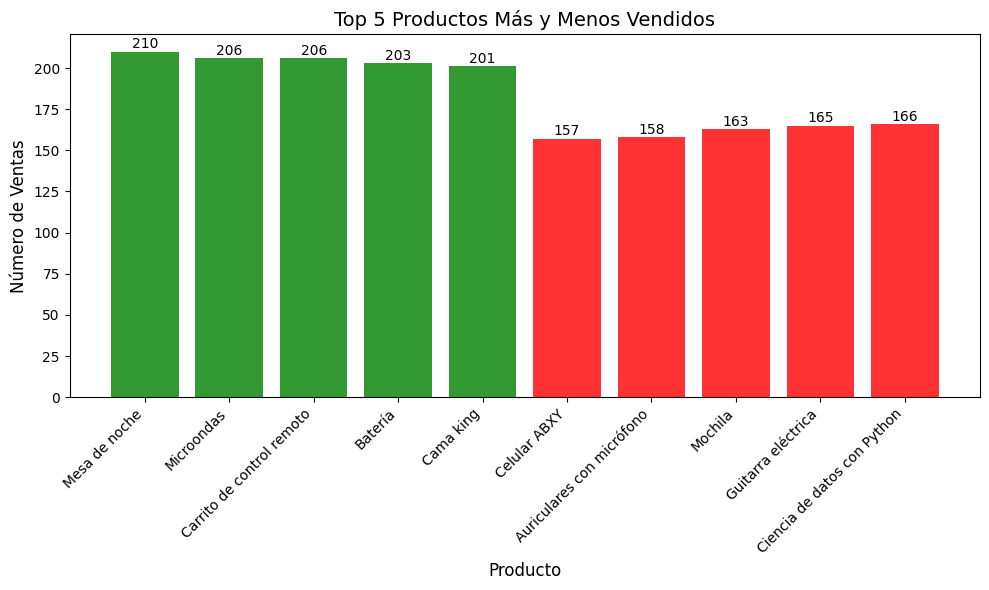

In [52]:
import matplotlib.pyplot as plt

top_n = 5

# Top 5 más vendidos
productos_mas = datos_completos.groupby('Producto')['Precio'].count().sort_values(ascending=False).head(top_n)

# Top 5 menos vendidos
productos_menos = datos_completos.groupby('Producto')['Precio'].count().sort_values(ascending=True).head(top_n)

# Combinar en un solo DataFrame
productos_combinados = pd.concat([productos_mas, productos_menos])
colores = ['green'] * top_n + ['red'] * top_n

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.bar(productos_combinados.index,
        productos_combinados.values,
        color=colores,
        alpha=0.8)

plt.title('Top 5 Productos Más y Menos Vendidos', fontsize=14)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Número de Ventas', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Etiquetas encima de las barras
for i, valor in enumerate(productos_combinados.values):
    plt.text(i, valor + 0.2, str(valor), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [35]:
#Productos mas vendidos por Tienda
def productos_mas_vendidos(tienda, top_n=5):
  datos_tienda = datos_completos[datos_completos['ID_Tienda'] == tienda]
  producto_mas_vendido = datos_tienda.groupby('Producto')['Precio'].count()
  producto_mas_vendido_ordenado = producto_mas_vendido.sort_values(ascending=False).head(top_n)
  #Obtenemos el producto para el eje X
  producto = producto_mas_vendido_ordenado.index
  #Obtenemos el valor de cuenta para el eje Y
  valores = producto_mas_vendido_ordenado.values
  plt.bar(producto,
          valores,
          #Transparencia a las barras (0 a 1)
          alpha =0.8)
  plt.title(f'Top {top_n} Productos Más Vendidos en {tienda}', fontsize=14)
  plt.xlabel('Producto', fontsize=12)
  plt.ylabel('Numero de Ventas',fontsize=12)
  plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar 45 grados, alinear a la derecha y ajustar el tamaño de la fuente
  plt.tight_layout()
  plt.show()

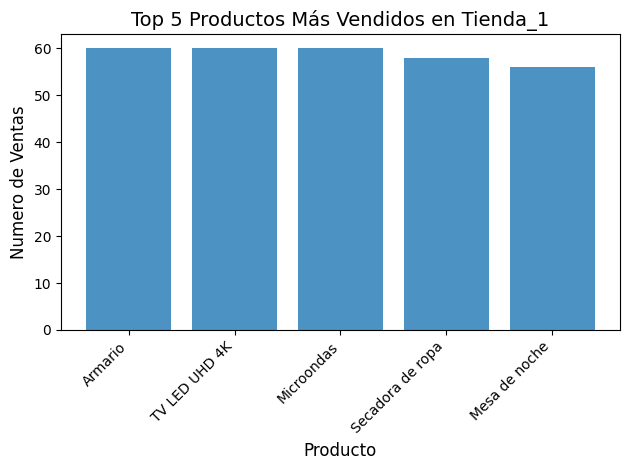

In [16]:
#Podemos ir colocando el ID de la tienda para ver el Top 5 productos mas vendidos
productos_mas_vendidos('Tienda_1')


In [36]:
#Productos menos vendidos por Tienda
def productos_menos_vendidos(tienda, top_n=5):
  datos_tienda = datos_completos[datos_completos['ID_Tienda'] == tienda]
  producto_menos_vendido = datos_tienda.groupby('Producto')['Precio'].count()
  producto_menos_vendido_ordenado = producto_menos_vendido.sort_values(ascending=True).head(top_n)
  #Obtenemos el producto para el eje X
  producto = producto_menos_vendido_ordenado.index
  #Obtenemos el valor de cuenta para el eje Y
  valores = producto_menos_vendido_ordenado.values
  plt.bar(producto,
          valores,
          color='red',
          #Transparencia a las barras (0 a 1)
          alpha =0.8)
  plt.title(f'Top {top_n} Productos Menos Vendidos en {tienda}', fontsize=14)
  plt.xlabel('Producto', fontsize=12)
  plt.ylabel('Numero de Ventas',fontsize=12)
  plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar 45 grados, alinear a la derecha y ajustar el tamaño de la fuente
  plt.tight_layout()
  plt.show()

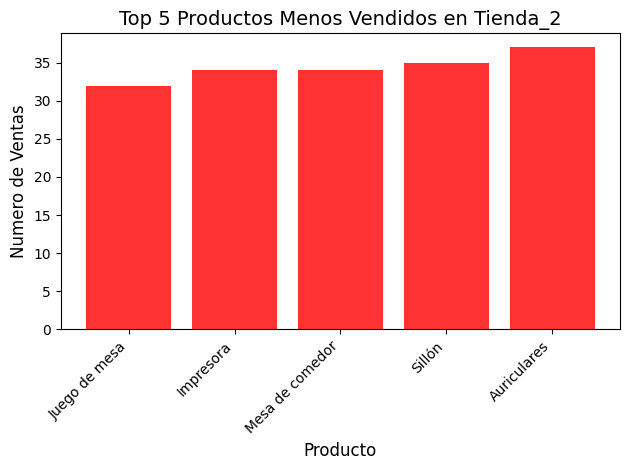

In [37]:
#Podemos ir colocando el ID de la tienda para ver el Top 5 productos menos vendidos
productos_menos_vendidos('Tienda_2')

# 5. Envío promedio por tienda

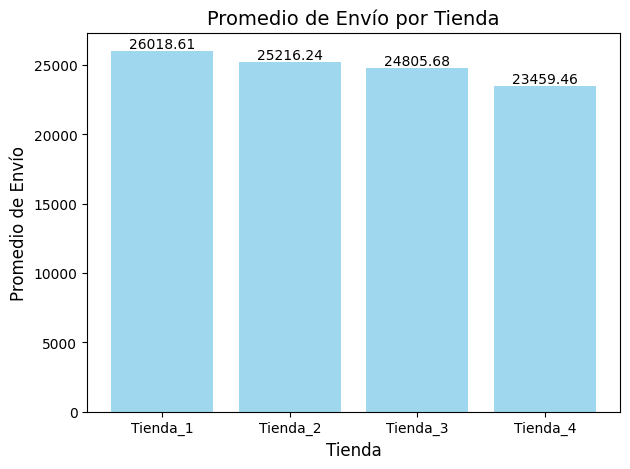

In [40]:
#Promedio de envio por tienda
promedio_envio_tienda = datos_completos.groupby('ID_Tienda')['Costo de envío'].mean()
nom_tienda = promedio_envio_tienda.index
promedio_envio = promedio_envio_tienda.values
plt.bar(nom_tienda, promedio_envio, color='skyblue', alpha=0.8)
plt.title('Promedio de Envío por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Promedio de Envío', fontsize=12)

# Agregar etiquetas encima de cada barra
for i, valor in enumerate(promedio_envio):
    plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()